In [1]:
#!/usr/bin/env python
import sys
import pymzml
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
class Visualization:
    I = []
    MZ = []
    RT = []
    count = 0
    X = []
    Y = []
    
    def visualise_data(self,mzml_file):
        run = pymzml.run.Reader(mzml_file)
        for n, spec in enumerate(run):
            print(
                "Spectrum {0}, MS level {ms_level} @ RT {scan_time:1.2f}".format(
                    spec.ID, ms_level=spec.ms_level, scan_time=spec.scan_time_in_minutes()
                )
            )
        print("Parsed {0} spectra from file {1}".format(n, mzml_file))
        
    def quantise_data(self,mzml_files,start_RT,end_RT,start_MZ,end_MZ,diff_value):
        run = pymzml.run.Reader(mzml_files)
        for n,spec in enumerate(run):
            if(spec.ms_level == 1):
                if spec.scan_time_in_minutes() > start_RT and spec.scan_time_in_minutes() < end_RT:     
                    if len(spec.mz) > 1:
                        f = interpolate.interp1d(spec.mz,spec.i,bounds_error=False,kind='linear',fill_value=(0,0))        
                        xnew = np.arange(start_MZ,end_MZ,diff_value)
                        ynew = f(xnew)  
                        self.I = np.append(self.I,[ynew])
                        self.RT = np.append(self.RT,spec.scan_time_in_minutes())
                        self.count = self.count+1 
        self.I = np.reshape(self.I,(self.count,-1))
        self.I = self.I.transpose() 
        self.MZ = np.arange(start_MZ,end_MZ,diff_value)
        self.X,self.Y = np.meshgrid(self.RT,self.MZ)
        
    def get_Intensity(self):
        print(self.I)
    
    def get_MZ(self):
        print(self.MZ)
    
    def get_RT(self):
        print(self.RT)
    
    def contour_plot(self,fig_size,title,xlabel,ylabel):
        fig = plt.figure(figsize = fig_size)        
        cp = plt.contourf(self.X,self.Y,self.I)
        plt.colorbar(cp)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
        
    def contour_plot3D(self,fig_size,title,xlabel,ylabel,zlabel):        
        fig = plt.figure(figsize = fig_size)
        ax = plt.axes(projection='3d')
        ax.contour3D(self.X,self.Y,self.I)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        
    def surface_plot3D(self,fig_size,title,xlabel,ylabel,zlabel):
        fig = plt.figure(figsize = fig_size)
        ax = plt.axes(projection='3d')
        ax.plot_surface(self.X, self.Y, self.I)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
     

In [3]:
vis = Visualization()
vis.quantise_data("PCC 11801 0 SEC IDA-1.mzML",14,15.50,184.8,185.2,0.001)

In [4]:
vis.I

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
vis.MZ

array([184.8  , 184.801, 184.802, 184.803, 184.804, 184.805, 184.806,
       184.807, 184.808, 184.809, 184.81 , 184.811, 184.812, 184.813,
       184.814, 184.815, 184.816, 184.817, 184.818, 184.819, 184.82 ,
       184.821, 184.822, 184.823, 184.824, 184.825, 184.826, 184.827,
       184.828, 184.829, 184.83 , 184.831, 184.832, 184.833, 184.834,
       184.835, 184.836, 184.837, 184.838, 184.839, 184.84 , 184.841,
       184.842, 184.843, 184.844, 184.845, 184.846, 184.847, 184.848,
       184.849, 184.85 , 184.851, 184.852, 184.853, 184.854, 184.855,
       184.856, 184.857, 184.858, 184.859, 184.86 , 184.861, 184.862,
       184.863, 184.864, 184.865, 184.866, 184.867, 184.868, 184.869,
       184.87 , 184.871, 184.872, 184.873, 184.874, 184.875, 184.876,
       184.877, 184.878, 184.879, 184.88 , 184.881, 184.882, 184.883,
       184.884, 184.885, 184.886, 184.887, 184.888, 184.889, 184.89 ,
       184.891, 184.892, 184.893, 184.894, 184.895, 184.896, 184.897,
       184.898, 184.

In [34]:
vis.RT

array([14.004     , 14.02295   , 14.042     , 14.061     , 14.07996667,
       14.09895   , 14.11796667, 14.13696667, 14.156     , 14.17501667,
       14.19405   , 14.21306667, 14.23211667, 14.25088333, 14.26998333,
       14.28905   , 14.30808333, 14.3271    , 14.34611667, 14.3651    ,
       14.3841    , 14.4031    , 14.42208333, 14.4411    , 14.46011667,
       14.47911667, 14.49813333, 14.51711667, 14.5361    , 14.5551    ,
       14.57408333, 14.59306667, 14.61201667, 14.63098333, 14.65      ,
       14.66901667, 14.68803333, 14.70701667, 14.72613333, 14.74515   ,
       14.7642    , 14.78316667, 14.80196667, 14.82106667, 14.8401    ,
       14.85915   , 14.87816667, 14.8972    , 14.91635   , 14.93566667,
       14.95466667, 14.9735    , 14.99263333, 15.01171667, 15.03071667,
       15.04968333, 15.06851667, 15.0876    , 15.10671667, 15.12571667,
       15.14473333, 15.16373333, 15.18288333, 15.2019    , 15.22113333,
       15.24038333, 15.25961667, 15.27873333, 15.2978    , 15.31

In [35]:
vis.count

79

In [36]:
vis.X

array([[14.004     , 14.02295   , 14.042     , ..., 15.45101667,
        15.47018333, 15.48925   ],
       [14.004     , 14.02295   , 14.042     , ..., 15.45101667,
        15.47018333, 15.48925   ],
       [14.004     , 14.02295   , 14.042     , ..., 15.45101667,
        15.47018333, 15.48925   ],
       ...,
       [14.004     , 14.02295   , 14.042     , ..., 15.45101667,
        15.47018333, 15.48925   ],
       [14.004     , 14.02295   , 14.042     , ..., 15.45101667,
        15.47018333, 15.48925   ],
       [14.004     , 14.02295   , 14.042     , ..., 15.45101667,
        15.47018333, 15.48925   ]])

In [37]:
vis.Y

array([[184.8  , 184.8  , 184.8  , ..., 184.8  , 184.8  , 184.8  ],
       [184.801, 184.801, 184.801, ..., 184.801, 184.801, 184.801],
       [184.802, 184.802, 184.802, ..., 184.802, 184.802, 184.802],
       ...,
       [185.197, 185.197, 185.197, ..., 185.197, 185.197, 185.197],
       [185.198, 185.198, 185.198, ..., 185.198, 185.198, 185.198],
       [185.199, 185.199, 185.199, ..., 185.199, 185.199, 185.199]])

In [38]:
vis.visualise_data("PCC 11801 0 SEC IDA-1.mzML")

Spectrum 1, MS level 1 @ RT 0.00
Spectrum 1, MS level 1 @ RT 0.01
Spectrum 1, MS level 1 @ RT 0.01
Spectrum 1, MS level 1 @ RT 0.02
Spectrum 1, MS level 1 @ RT 0.02
Spectrum 1, MS level 1 @ RT 0.03
Spectrum 1, MS level 1 @ RT 0.04
Spectrum 1, MS level 1 @ RT 0.04
Spectrum 1, MS level 1 @ RT 0.05
Spectrum 1, MS level 1 @ RT 0.05
Spectrum 1, MS level 1 @ RT 0.06
Spectrum 1, MS level 1 @ RT 0.06
Spectrum 1, MS level 1 @ RT 0.07
Spectrum 1, MS level 1 @ RT 0.07
Spectrum 1, MS level 1 @ RT 0.08
Spectrum 1, MS level 1 @ RT 0.08
Spectrum 1, MS level 1 @ RT 0.09
Spectrum 1, MS level 1 @ RT 0.09
Spectrum 1, MS level 1 @ RT 0.10
Spectrum 1, MS level 1 @ RT 0.10
Spectrum 1, MS level 1 @ RT 0.11
Spectrum 2, MS level 2 @ RT 0.11
Spectrum 3, MS level 2 @ RT 0.11
Spectrum 4, MS level 2 @ RT 0.11
Spectrum 5, MS level 2 @ RT 0.12
Spectrum 6, MS level 2 @ RT 0.12
Spectrum 7, MS level 2 @ RT 0.12
Spectrum 8, MS level 2 @ RT 0.12
Spectrum 9, MS level 2 @ RT 0.12
Spectrum 1, MS level 1 @ RT 0.13
Spectrum 2

Spectrum 4, MS level 2 @ RT 0.63
Spectrum 5, MS level 2 @ RT 0.63
Spectrum 6, MS level 2 @ RT 0.63
Spectrum 7, MS level 2 @ RT 0.63
Spectrum 8, MS level 2 @ RT 0.64
Spectrum 9, MS level 2 @ RT 0.64
Spectrum 1, MS level 1 @ RT 0.64
Spectrum 2, MS level 2 @ RT 0.65
Spectrum 3, MS level 2 @ RT 0.65
Spectrum 4, MS level 2 @ RT 0.65
Spectrum 5, MS level 2 @ RT 0.65
Spectrum 6, MS level 2 @ RT 0.65
Spectrum 7, MS level 2 @ RT 0.66
Spectrum 1, MS level 1 @ RT 0.66
Spectrum 2, MS level 2 @ RT 0.66
Spectrum 3, MS level 2 @ RT 0.67
Spectrum 4, MS level 2 @ RT 0.67
Spectrum 5, MS level 2 @ RT 0.67
Spectrum 6, MS level 2 @ RT 0.67
Spectrum 7, MS level 2 @ RT 0.67
Spectrum 8, MS level 2 @ RT 0.67
Spectrum 9, MS level 2 @ RT 0.68
Spectrum 1, MS level 1 @ RT 0.68
Spectrum 2, MS level 2 @ RT 0.68
Spectrum 3, MS level 2 @ RT 0.68
Spectrum 4, MS level 2 @ RT 0.69
Spectrum 5, MS level 2 @ RT 0.69
Spectrum 6, MS level 2 @ RT 0.69
Spectrum 7, MS level 2 @ RT 0.69
Spectrum 1, MS level 1 @ RT 0.70
Spectrum 2

Spectrum 1, MS level 1 @ RT 1.46
Spectrum 2, MS level 2 @ RT 1.46
Spectrum 3, MS level 2 @ RT 1.47
Spectrum 4, MS level 2 @ RT 1.47
Spectrum 5, MS level 2 @ RT 1.47
Spectrum 6, MS level 2 @ RT 1.47
Spectrum 7, MS level 2 @ RT 1.47
Spectrum 8, MS level 2 @ RT 1.47
Spectrum 9, MS level 2 @ RT 1.48
Spectrum 1, MS level 1 @ RT 1.48
Spectrum 2, MS level 2 @ RT 1.48
Spectrum 3, MS level 2 @ RT 1.48
Spectrum 4, MS level 2 @ RT 1.49
Spectrum 5, MS level 2 @ RT 1.49
Spectrum 6, MS level 2 @ RT 1.49
Spectrum 7, MS level 2 @ RT 1.49
Spectrum 8, MS level 2 @ RT 1.49
Spectrum 9, MS level 2 @ RT 1.49
Spectrum 1, MS level 1 @ RT 1.50
Spectrum 2, MS level 2 @ RT 1.50
Spectrum 3, MS level 2 @ RT 1.50
Spectrum 4, MS level 2 @ RT 1.51
Spectrum 5, MS level 2 @ RT 1.51
Spectrum 6, MS level 2 @ RT 1.51
Spectrum 7, MS level 2 @ RT 1.51
Spectrum 8, MS level 2 @ RT 1.51
Spectrum 9, MS level 2 @ RT 1.51
Spectrum 1, MS level 1 @ RT 1.52
Spectrum 2, MS level 2 @ RT 1.52
Spectrum 3, MS level 2 @ RT 1.52
Spectrum 4

Spectrum 7, MS level 2 @ RT 2.31
Spectrum 8, MS level 2 @ RT 2.31
Spectrum 1, MS level 1 @ RT 2.31
Spectrum 2, MS level 2 @ RT 2.32
Spectrum 3, MS level 2 @ RT 2.32
Spectrum 4, MS level 2 @ RT 2.32
Spectrum 5, MS level 2 @ RT 2.32
Spectrum 6, MS level 2 @ RT 2.32
Spectrum 7, MS level 2 @ RT 2.33
Spectrum 1, MS level 1 @ RT 2.33
Spectrum 2, MS level 2 @ RT 2.34
Spectrum 3, MS level 2 @ RT 2.34
Spectrum 4, MS level 2 @ RT 2.34
Spectrum 5, MS level 2 @ RT 2.34
Spectrum 6, MS level 2 @ RT 2.34
Spectrum 7, MS level 2 @ RT 2.35
Spectrum 1, MS level 1 @ RT 2.35
Spectrum 2, MS level 2 @ RT 2.35
Spectrum 3, MS level 2 @ RT 2.36
Spectrum 4, MS level 2 @ RT 2.36
Spectrum 5, MS level 2 @ RT 2.36
Spectrum 6, MS level 2 @ RT 2.36
Spectrum 7, MS level 2 @ RT 2.36
Spectrum 8, MS level 2 @ RT 2.37
Spectrum 1, MS level 1 @ RT 2.37
Spectrum 1, MS level 1 @ RT 2.38
Spectrum 2, MS level 2 @ RT 2.38
Spectrum 3, MS level 2 @ RT 2.39
Spectrum 1, MS level 1 @ RT 2.39
Spectrum 2, MS level 2 @ RT 2.40
Spectrum 3

Spectrum 8, MS level 2 @ RT 3.88
Spectrum 9, MS level 2 @ RT 3.88
Spectrum 1, MS level 1 @ RT 3.89
Spectrum 2, MS level 2 @ RT 3.89
Spectrum 3, MS level 2 @ RT 3.89
Spectrum 4, MS level 2 @ RT 3.90
Spectrum 5, MS level 2 @ RT 3.90
Spectrum 6, MS level 2 @ RT 3.90
Spectrum 1, MS level 1 @ RT 3.91
Spectrum 2, MS level 2 @ RT 3.91
Spectrum 3, MS level 2 @ RT 3.92
Spectrum 4, MS level 2 @ RT 3.92
Spectrum 1, MS level 1 @ RT 3.93
Spectrum 2, MS level 2 @ RT 3.93
Spectrum 3, MS level 2 @ RT 3.93
Spectrum 4, MS level 2 @ RT 3.94
Spectrum 5, MS level 2 @ RT 3.94
Spectrum 1, MS level 1 @ RT 3.94
Spectrum 2, MS level 2 @ RT 3.95
Spectrum 3, MS level 2 @ RT 3.95
Spectrum 4, MS level 2 @ RT 3.95
Spectrum 5, MS level 2 @ RT 3.95
Spectrum 6, MS level 2 @ RT 3.95
Spectrum 7, MS level 2 @ RT 3.96
Spectrum 8, MS level 2 @ RT 3.96
Spectrum 9, MS level 2 @ RT 3.96
Spectrum 1, MS level 1 @ RT 3.96
Spectrum 2, MS level 2 @ RT 3.97
Spectrum 3, MS level 2 @ RT 3.97
Spectrum 4, MS level 2 @ RT 3.98
Spectrum 1

Spectrum 1, MS level 1 @ RT 4.51
Spectrum 2, MS level 2 @ RT 4.51
Spectrum 3, MS level 2 @ RT 4.51
Spectrum 4, MS level 2 @ RT 4.52
Spectrum 5, MS level 2 @ RT 4.52
Spectrum 6, MS level 2 @ RT 4.52
Spectrum 7, MS level 2 @ RT 4.52
Spectrum 8, MS level 2 @ RT 4.52
Spectrum 9, MS level 2 @ RT 4.52
Spectrum 1, MS level 1 @ RT 4.53
Spectrum 2, MS level 2 @ RT 4.53
Spectrum 3, MS level 2 @ RT 4.53
Spectrum 4, MS level 2 @ RT 4.54
Spectrum 5, MS level 2 @ RT 4.54
Spectrum 6, MS level 2 @ RT 4.54
Spectrum 7, MS level 2 @ RT 4.54
Spectrum 8, MS level 2 @ RT 4.54
Spectrum 9, MS level 2 @ RT 4.54
Spectrum 1, MS level 1 @ RT 4.55
Spectrum 2, MS level 2 @ RT 4.55
Spectrum 3, MS level 2 @ RT 4.55
Spectrum 4, MS level 2 @ RT 4.56
Spectrum 5, MS level 2 @ RT 4.56
Spectrum 6, MS level 2 @ RT 4.56
Spectrum 1, MS level 1 @ RT 4.57
Spectrum 2, MS level 2 @ RT 4.57
Spectrum 3, MS level 2 @ RT 4.57
Spectrum 4, MS level 2 @ RT 4.57
Spectrum 5, MS level 2 @ RT 4.58
Spectrum 6, MS level 2 @ RT 4.58
Spectrum 7

Spectrum 8, MS level 2 @ RT 5.55
Spectrum 1, MS level 1 @ RT 5.55
Spectrum 2, MS level 2 @ RT 5.56
Spectrum 3, MS level 2 @ RT 5.56
Spectrum 4, MS level 2 @ RT 5.57
Spectrum 1, MS level 1 @ RT 5.57
Spectrum 2, MS level 2 @ RT 5.57
Spectrum 3, MS level 2 @ RT 5.57
Spectrum 4, MS level 2 @ RT 5.58
Spectrum 5, MS level 2 @ RT 5.58
Spectrum 6, MS level 2 @ RT 5.58
Spectrum 7, MS level 2 @ RT 5.58
Spectrum 1, MS level 1 @ RT 5.59
Spectrum 2, MS level 2 @ RT 5.59
Spectrum 3, MS level 2 @ RT 5.60
Spectrum 4, MS level 2 @ RT 5.60
Spectrum 1, MS level 1 @ RT 5.61
Spectrum 2, MS level 2 @ RT 5.61
Spectrum 3, MS level 2 @ RT 5.61
Spectrum 4, MS level 2 @ RT 5.61
Spectrum 5, MS level 2 @ RT 5.62
Spectrum 6, MS level 2 @ RT 5.62
Spectrum 7, MS level 2 @ RT 5.62
Spectrum 8, MS level 2 @ RT 5.62
Spectrum 9, MS level 2 @ RT 5.62
Spectrum 1, MS level 1 @ RT 5.63
Spectrum 2, MS level 2 @ RT 5.63
Spectrum 3, MS level 2 @ RT 5.63
Spectrum 4, MS level 2 @ RT 5.63
Spectrum 5, MS level 2 @ RT 5.63
Spectrum 6

Spectrum 1, MS level 1 @ RT 6.44
Spectrum 2, MS level 2 @ RT 6.44
Spectrum 3, MS level 2 @ RT 6.44
Spectrum 4, MS level 2 @ RT 6.44
Spectrum 5, MS level 2 @ RT 6.44
Spectrum 6, MS level 2 @ RT 6.44
Spectrum 7, MS level 2 @ RT 6.45
Spectrum 8, MS level 2 @ RT 6.45
Spectrum 1, MS level 1 @ RT 6.45
Spectrum 2, MS level 2 @ RT 6.46
Spectrum 3, MS level 2 @ RT 6.46
Spectrum 4, MS level 2 @ RT 6.46
Spectrum 5, MS level 2 @ RT 6.46
Spectrum 6, MS level 2 @ RT 6.46
Spectrum 7, MS level 2 @ RT 6.47
Spectrum 8, MS level 2 @ RT 6.47
Spectrum 9, MS level 2 @ RT 6.47
Spectrum 1, MS level 1 @ RT 6.47
Spectrum 2, MS level 2 @ RT 6.48
Spectrum 3, MS level 2 @ RT 6.48
Spectrum 4, MS level 2 @ RT 6.48
Spectrum 5, MS level 2 @ RT 6.49
Spectrum 1, MS level 1 @ RT 6.49
Spectrum 2, MS level 2 @ RT 6.50
Spectrum 3, MS level 2 @ RT 6.50
Spectrum 4, MS level 2 @ RT 6.50
Spectrum 5, MS level 2 @ RT 6.50
Spectrum 6, MS level 2 @ RT 6.50
Spectrum 7, MS level 2 @ RT 6.50
Spectrum 8, MS level 2 @ RT 6.51
Spectrum 1

Spectrum 1, MS level 1 @ RT 7.02
Spectrum 2, MS level 2 @ RT 7.03
Spectrum 3, MS level 2 @ RT 7.03
Spectrum 4, MS level 2 @ RT 7.03
Spectrum 5, MS level 2 @ RT 7.03
Spectrum 6, MS level 2 @ RT 7.03
Spectrum 7, MS level 2 @ RT 7.03
Spectrum 8, MS level 2 @ RT 7.04
Spectrum 9, MS level 2 @ RT 7.04
Spectrum 1, MS level 1 @ RT 7.04
Spectrum 2, MS level 2 @ RT 7.04
Spectrum 3, MS level 2 @ RT 7.05
Spectrum 4, MS level 2 @ RT 7.05
Spectrum 5, MS level 2 @ RT 7.05
Spectrum 6, MS level 2 @ RT 7.05
Spectrum 7, MS level 2 @ RT 7.05
Spectrum 8, MS level 2 @ RT 7.05
Spectrum 9, MS level 2 @ RT 7.06
Spectrum 1, MS level 1 @ RT 7.06
Spectrum 2, MS level 2 @ RT 7.06
Spectrum 3, MS level 2 @ RT 7.06
Spectrum 4, MS level 2 @ RT 7.07
Spectrum 5, MS level 2 @ RT 7.07
Spectrum 6, MS level 2 @ RT 7.07
Spectrum 7, MS level 2 @ RT 7.07
Spectrum 8, MS level 2 @ RT 7.07
Spectrum 9, MS level 2 @ RT 7.07
Spectrum 1, MS level 1 @ RT 7.08
Spectrum 2, MS level 2 @ RT 7.08
Spectrum 3, MS level 2 @ RT 7.08
Spectrum 4

Spectrum 8, MS level 2 @ RT 7.70
Spectrum 9, MS level 2 @ RT 7.70
Spectrum 1, MS level 1 @ RT 7.71
Spectrum 2, MS level 2 @ RT 7.71
Spectrum 3, MS level 2 @ RT 7.71
Spectrum 4, MS level 2 @ RT 7.71
Spectrum 5, MS level 2 @ RT 7.71
Spectrum 6, MS level 2 @ RT 7.72
Spectrum 7, MS level 2 @ RT 7.72
Spectrum 8, MS level 2 @ RT 7.72
Spectrum 9, MS level 2 @ RT 7.72
Spectrum 1, MS level 1 @ RT 7.73
Spectrum 2, MS level 2 @ RT 7.73
Spectrum 3, MS level 2 @ RT 7.73
Spectrum 4, MS level 2 @ RT 7.73
Spectrum 5, MS level 2 @ RT 7.73
Spectrum 6, MS level 2 @ RT 7.73
Spectrum 7, MS level 2 @ RT 7.74
Spectrum 8, MS level 2 @ RT 7.74
Spectrum 9, MS level 2 @ RT 7.74
Spectrum 1, MS level 1 @ RT 7.74
Spectrum 2, MS level 2 @ RT 7.75
Spectrum 3, MS level 2 @ RT 7.75
Spectrum 4, MS level 2 @ RT 7.75
Spectrum 5, MS level 2 @ RT 7.75
Spectrum 6, MS level 2 @ RT 7.75
Spectrum 7, MS level 2 @ RT 7.76
Spectrum 8, MS level 2 @ RT 7.76
Spectrum 9, MS level 2 @ RT 7.76
Spectrum 1, MS level 1 @ RT 7.76
Spectrum 2

Spectrum 6, MS level 2 @ RT 8.29
Spectrum 7, MS level 2 @ RT 8.29
Spectrum 8, MS level 2 @ RT 8.29
Spectrum 9, MS level 2 @ RT 8.29
Spectrum 1, MS level 1 @ RT 8.30
Spectrum 2, MS level 2 @ RT 8.30
Spectrum 3, MS level 2 @ RT 8.30
Spectrum 4, MS level 2 @ RT 8.30
Spectrum 5, MS level 2 @ RT 8.30
Spectrum 6, MS level 2 @ RT 8.30
Spectrum 7, MS level 2 @ RT 8.31
Spectrum 8, MS level 2 @ RT 8.31
Spectrum 9, MS level 2 @ RT 8.31
Spectrum 1, MS level 1 @ RT 8.31
Spectrum 2, MS level 2 @ RT 8.32
Spectrum 3, MS level 2 @ RT 8.32
Spectrum 4, MS level 2 @ RT 8.32
Spectrum 5, MS level 2 @ RT 8.32
Spectrum 6, MS level 2 @ RT 8.32
Spectrum 7, MS level 2 @ RT 8.33
Spectrum 8, MS level 2 @ RT 8.33
Spectrum 9, MS level 2 @ RT 8.33
Spectrum 1, MS level 1 @ RT 8.33
Spectrum 2, MS level 2 @ RT 8.34
Spectrum 3, MS level 2 @ RT 8.34
Spectrum 4, MS level 2 @ RT 8.34
Spectrum 5, MS level 2 @ RT 8.34
Spectrum 6, MS level 2 @ RT 8.34
Spectrum 7, MS level 2 @ RT 8.34
Spectrum 8, MS level 2 @ RT 8.35
Spectrum 9

Spectrum 5, MS level 2 @ RT 8.97
Spectrum 6, MS level 2 @ RT 8.97
Spectrum 7, MS level 2 @ RT 8.97
Spectrum 8, MS level 2 @ RT 8.97
Spectrum 9, MS level 2 @ RT 8.98
Spectrum 1, MS level 1 @ RT 8.98
Spectrum 2, MS level 2 @ RT 8.98
Spectrum 3, MS level 2 @ RT 8.98
Spectrum 4, MS level 2 @ RT 8.99
Spectrum 5, MS level 2 @ RT 8.99
Spectrum 6, MS level 2 @ RT 8.99
Spectrum 7, MS level 2 @ RT 8.99
Spectrum 8, MS level 2 @ RT 8.99
Spectrum 9, MS level 2 @ RT 8.99
Spectrum 1, MS level 1 @ RT 9.00
Spectrum 2, MS level 2 @ RT 9.00
Spectrum 3, MS level 2 @ RT 9.00
Spectrum 4, MS level 2 @ RT 9.01
Spectrum 5, MS level 2 @ RT 9.01
Spectrum 6, MS level 2 @ RT 9.01
Spectrum 7, MS level 2 @ RT 9.01
Spectrum 8, MS level 2 @ RT 9.01
Spectrum 1, MS level 1 @ RT 9.02
Spectrum 2, MS level 2 @ RT 9.02
Spectrum 3, MS level 2 @ RT 9.02
Spectrum 4, MS level 2 @ RT 9.02
Spectrum 5, MS level 2 @ RT 9.03
Spectrum 6, MS level 2 @ RT 9.03
Spectrum 7, MS level 2 @ RT 9.03
Spectrum 8, MS level 2 @ RT 9.03
Spectrum 9

Spectrum 2, MS level 2 @ RT 9.55
Spectrum 3, MS level 2 @ RT 9.55
Spectrum 4, MS level 2 @ RT 9.56
Spectrum 5, MS level 2 @ RT 9.56
Spectrum 6, MS level 2 @ RT 9.56
Spectrum 7, MS level 2 @ RT 9.56
Spectrum 1, MS level 1 @ RT 9.57
Spectrum 2, MS level 2 @ RT 9.57
Spectrum 3, MS level 2 @ RT 9.57
Spectrum 4, MS level 2 @ RT 9.58
Spectrum 5, MS level 2 @ RT 9.58
Spectrum 6, MS level 2 @ RT 9.58
Spectrum 7, MS level 2 @ RT 9.58
Spectrum 8, MS level 2 @ RT 9.58
Spectrum 1, MS level 1 @ RT 9.59
Spectrum 2, MS level 2 @ RT 9.59
Spectrum 3, MS level 2 @ RT 9.59
Spectrum 4, MS level 2 @ RT 9.59
Spectrum 5, MS level 2 @ RT 9.60
Spectrum 6, MS level 2 @ RT 9.60
Spectrum 7, MS level 2 @ RT 9.60
Spectrum 1, MS level 1 @ RT 9.61
Spectrum 2, MS level 2 @ RT 9.61
Spectrum 3, MS level 2 @ RT 9.61
Spectrum 4, MS level 2 @ RT 9.61
Spectrum 5, MS level 2 @ RT 9.61
Spectrum 6, MS level 2 @ RT 9.62
Spectrum 7, MS level 2 @ RT 9.62
Spectrum 1, MS level 1 @ RT 9.63
Spectrum 2, MS level 2 @ RT 9.63
Spectrum 3

Spectrum 4, MS level 2 @ RT 10.20
Spectrum 5, MS level 2 @ RT 10.20
Spectrum 6, MS level 2 @ RT 10.20
Spectrum 7, MS level 2 @ RT 10.20
Spectrum 8, MS level 2 @ RT 10.20
Spectrum 9, MS level 2 @ RT 10.20
Spectrum 1, MS level 1 @ RT 10.21
Spectrum 2, MS level 2 @ RT 10.21
Spectrum 3, MS level 2 @ RT 10.21
Spectrum 4, MS level 2 @ RT 10.21
Spectrum 5, MS level 2 @ RT 10.22
Spectrum 6, MS level 2 @ RT 10.22
Spectrum 7, MS level 2 @ RT 10.22
Spectrum 8, MS level 2 @ RT 10.22
Spectrum 9, MS level 2 @ RT 10.22
Spectrum 1, MS level 1 @ RT 10.23
Spectrum 2, MS level 2 @ RT 10.23
Spectrum 3, MS level 2 @ RT 10.23
Spectrum 4, MS level 2 @ RT 10.23
Spectrum 5, MS level 2 @ RT 10.23
Spectrum 6, MS level 2 @ RT 10.24
Spectrum 7, MS level 2 @ RT 10.24
Spectrum 8, MS level 2 @ RT 10.24
Spectrum 9, MS level 2 @ RT 10.24
Spectrum 1, MS level 1 @ RT 10.25
Spectrum 2, MS level 2 @ RT 10.25
Spectrum 3, MS level 2 @ RT 10.25
Spectrum 4, MS level 2 @ RT 10.25
Spectrum 5, MS level 2 @ RT 10.25
Spectrum 6, MS

Spectrum 1, MS level 1 @ RT 10.76
Spectrum 2, MS level 2 @ RT 10.76
Spectrum 3, MS level 2 @ RT 10.76
Spectrum 4, MS level 2 @ RT 10.76
Spectrum 5, MS level 2 @ RT 10.77
Spectrum 6, MS level 2 @ RT 10.77
Spectrum 7, MS level 2 @ RT 10.77
Spectrum 8, MS level 2 @ RT 10.77
Spectrum 9, MS level 2 @ RT 10.77
Spectrum 1, MS level 1 @ RT 10.78
Spectrum 2, MS level 2 @ RT 10.78
Spectrum 3, MS level 2 @ RT 10.78
Spectrum 4, MS level 2 @ RT 10.78
Spectrum 5, MS level 2 @ RT 10.79
Spectrum 6, MS level 2 @ RT 10.79
Spectrum 7, MS level 2 @ RT 10.79
Spectrum 8, MS level 2 @ RT 10.79
Spectrum 9, MS level 2 @ RT 10.79
Spectrum 1, MS level 1 @ RT 10.80
Spectrum 2, MS level 2 @ RT 10.80
Spectrum 3, MS level 2 @ RT 10.80
Spectrum 4, MS level 2 @ RT 10.80
Spectrum 5, MS level 2 @ RT 10.80
Spectrum 6, MS level 2 @ RT 10.81
Spectrum 7, MS level 2 @ RT 10.81
Spectrum 8, MS level 2 @ RT 10.81
Spectrum 9, MS level 2 @ RT 10.81
Spectrum 1, MS level 1 @ RT 10.82
Spectrum 2, MS level 2 @ RT 10.82
Spectrum 3, MS

Spectrum 1, MS level 1 @ RT 11.37
Spectrum 2, MS level 2 @ RT 11.37
Spectrum 3, MS level 2 @ RT 11.37
Spectrum 4, MS level 2 @ RT 11.37
Spectrum 5, MS level 2 @ RT 11.37
Spectrum 6, MS level 2 @ RT 11.38
Spectrum 7, MS level 2 @ RT 11.38
Spectrum 8, MS level 2 @ RT 11.38
Spectrum 9, MS level 2 @ RT 11.38
Spectrum 1, MS level 1 @ RT 11.39
Spectrum 2, MS level 2 @ RT 11.39
Spectrum 3, MS level 2 @ RT 11.39
Spectrum 4, MS level 2 @ RT 11.39
Spectrum 5, MS level 2 @ RT 11.39
Spectrum 6, MS level 2 @ RT 11.39
Spectrum 7, MS level 2 @ RT 11.40
Spectrum 8, MS level 2 @ RT 11.40
Spectrum 9, MS level 2 @ RT 11.40
Spectrum 1, MS level 1 @ RT 11.40
Spectrum 2, MS level 2 @ RT 11.41
Spectrum 3, MS level 2 @ RT 11.41
Spectrum 4, MS level 2 @ RT 11.41
Spectrum 5, MS level 2 @ RT 11.41
Spectrum 6, MS level 2 @ RT 11.41
Spectrum 7, MS level 2 @ RT 11.42
Spectrum 8, MS level 2 @ RT 11.42
Spectrum 9, MS level 2 @ RT 11.42
Spectrum 1, MS level 1 @ RT 11.42
Spectrum 2, MS level 2 @ RT 11.43
Spectrum 3, MS

Spectrum 1, MS level 1 @ RT 11.92
Spectrum 2, MS level 2 @ RT 11.92
Spectrum 3, MS level 2 @ RT 11.92
Spectrum 4, MS level 2 @ RT 11.92
Spectrum 5, MS level 2 @ RT 11.93
Spectrum 6, MS level 2 @ RT 11.93
Spectrum 7, MS level 2 @ RT 11.93
Spectrum 8, MS level 2 @ RT 11.93
Spectrum 9, MS level 2 @ RT 11.93
Spectrum 1, MS level 1 @ RT 11.94
Spectrum 2, MS level 2 @ RT 11.94
Spectrum 3, MS level 2 @ RT 11.94
Spectrum 4, MS level 2 @ RT 11.94
Spectrum 5, MS level 2 @ RT 11.94
Spectrum 6, MS level 2 @ RT 11.95
Spectrum 7, MS level 2 @ RT 11.95
Spectrum 8, MS level 2 @ RT 11.95
Spectrum 1, MS level 1 @ RT 11.96
Spectrum 2, MS level 2 @ RT 11.96
Spectrum 3, MS level 2 @ RT 11.96
Spectrum 4, MS level 2 @ RT 11.96
Spectrum 5, MS level 2 @ RT 11.96
Spectrum 6, MS level 2 @ RT 11.96
Spectrum 7, MS level 2 @ RT 11.97
Spectrum 8, MS level 2 @ RT 11.97
Spectrum 9, MS level 2 @ RT 11.97
Spectrum 1, MS level 1 @ RT 11.97
Spectrum 2, MS level 2 @ RT 11.98
Spectrum 3, MS level 2 @ RT 11.98
Spectrum 4, MS

Spectrum 9, MS level 2 @ RT 12.52
Spectrum 1, MS level 1 @ RT 12.53
Spectrum 2, MS level 2 @ RT 12.53
Spectrum 3, MS level 2 @ RT 12.53
Spectrum 4, MS level 2 @ RT 12.53
Spectrum 5, MS level 2 @ RT 12.53
Spectrum 6, MS level 2 @ RT 12.54
Spectrum 7, MS level 2 @ RT 12.54
Spectrum 1, MS level 1 @ RT 12.54
Spectrum 2, MS level 2 @ RT 12.55
Spectrum 3, MS level 2 @ RT 12.55
Spectrum 4, MS level 2 @ RT 12.55
Spectrum 5, MS level 2 @ RT 12.55
Spectrum 6, MS level 2 @ RT 12.55
Spectrum 7, MS level 2 @ RT 12.56
Spectrum 8, MS level 2 @ RT 12.56
Spectrum 9, MS level 2 @ RT 12.56
Spectrum 1, MS level 1 @ RT 12.56
Spectrum 2, MS level 2 @ RT 12.57
Spectrum 3, MS level 2 @ RT 12.57
Spectrum 4, MS level 2 @ RT 12.57
Spectrum 5, MS level 2 @ RT 12.57
Spectrum 6, MS level 2 @ RT 12.57
Spectrum 7, MS level 2 @ RT 12.57
Spectrum 8, MS level 2 @ RT 12.58
Spectrum 9, MS level 2 @ RT 12.58
Spectrum 1, MS level 1 @ RT 12.58
Spectrum 2, MS level 2 @ RT 12.59
Spectrum 3, MS level 2 @ RT 12.59
Spectrum 4, MS

Spectrum 1, MS level 1 @ RT 13.17
Spectrum 2, MS level 2 @ RT 13.17
Spectrum 3, MS level 2 @ RT 13.17
Spectrum 4, MS level 2 @ RT 13.18
Spectrum 5, MS level 2 @ RT 13.18
Spectrum 6, MS level 2 @ RT 13.18
Spectrum 7, MS level 2 @ RT 13.18
Spectrum 8, MS level 2 @ RT 13.18
Spectrum 9, MS level 2 @ RT 13.18
Spectrum 1, MS level 1 @ RT 13.19
Spectrum 2, MS level 2 @ RT 13.19
Spectrum 3, MS level 2 @ RT 13.19
Spectrum 4, MS level 2 @ RT 13.19
Spectrum 5, MS level 2 @ RT 13.20
Spectrum 6, MS level 2 @ RT 13.20
Spectrum 7, MS level 2 @ RT 13.20
Spectrum 8, MS level 2 @ RT 13.20
Spectrum 9, MS level 2 @ RT 13.20
Spectrum 1, MS level 1 @ RT 13.21
Spectrum 2, MS level 2 @ RT 13.21
Spectrum 3, MS level 2 @ RT 13.21
Spectrum 4, MS level 2 @ RT 13.21
Spectrum 5, MS level 2 @ RT 13.21
Spectrum 6, MS level 2 @ RT 13.22
Spectrum 7, MS level 2 @ RT 13.22
Spectrum 8, MS level 2 @ RT 13.22
Spectrum 9, MS level 2 @ RT 13.22
Spectrum 1, MS level 1 @ RT 13.23
Spectrum 2, MS level 2 @ RT 13.23
Spectrum 3, MS

Spectrum 6, MS level 2 @ RT 13.69
Spectrum 7, MS level 2 @ RT 13.69
Spectrum 8, MS level 2 @ RT 13.69
Spectrum 9, MS level 2 @ RT 13.70
Spectrum 1, MS level 1 @ RT 13.70
Spectrum 2, MS level 2 @ RT 13.70
Spectrum 3, MS level 2 @ RT 13.70
Spectrum 4, MS level 2 @ RT 13.71
Spectrum 5, MS level 2 @ RT 13.71
Spectrum 6, MS level 2 @ RT 13.71
Spectrum 7, MS level 2 @ RT 13.71
Spectrum 8, MS level 2 @ RT 13.71
Spectrum 9, MS level 2 @ RT 13.71
Spectrum 1, MS level 1 @ RT 13.72
Spectrum 2, MS level 2 @ RT 13.72
Spectrum 3, MS level 2 @ RT 13.72
Spectrum 4, MS level 2 @ RT 13.72
Spectrum 5, MS level 2 @ RT 13.73
Spectrum 6, MS level 2 @ RT 13.73
Spectrum 7, MS level 2 @ RT 13.73
Spectrum 8, MS level 2 @ RT 13.73
Spectrum 9, MS level 2 @ RT 13.73
Spectrum 1, MS level 1 @ RT 13.74
Spectrum 2, MS level 2 @ RT 13.74
Spectrum 3, MS level 2 @ RT 13.74
Spectrum 4, MS level 2 @ RT 13.74
Spectrum 5, MS level 2 @ RT 13.75
Spectrum 6, MS level 2 @ RT 13.75
Spectrum 7, MS level 2 @ RT 13.75
Spectrum 8, MS

Spectrum 1, MS level 1 @ RT 14.21
Spectrum 2, MS level 2 @ RT 14.22
Spectrum 3, MS level 2 @ RT 14.22
Spectrum 4, MS level 2 @ RT 14.22
Spectrum 5, MS level 2 @ RT 14.22
Spectrum 6, MS level 2 @ RT 14.22
Spectrum 7, MS level 2 @ RT 14.22
Spectrum 8, MS level 2 @ RT 14.23
Spectrum 9, MS level 2 @ RT 14.23
Spectrum 1, MS level 1 @ RT 14.23
Spectrum 2, MS level 2 @ RT 14.23
Spectrum 3, MS level 2 @ RT 14.24
Spectrum 4, MS level 2 @ RT 14.24
Spectrum 5, MS level 2 @ RT 14.24
Spectrum 6, MS level 2 @ RT 14.24
Spectrum 7, MS level 2 @ RT 14.24
Spectrum 8, MS level 2 @ RT 14.24
Spectrum 9, MS level 2 @ RT 14.25
Spectrum 1, MS level 1 @ RT 14.25
Spectrum 2, MS level 2 @ RT 14.25
Spectrum 3, MS level 2 @ RT 14.26
Spectrum 4, MS level 2 @ RT 14.26
Spectrum 5, MS level 2 @ RT 14.26
Spectrum 6, MS level 2 @ RT 14.26
Spectrum 7, MS level 2 @ RT 14.26
Spectrum 8, MS level 2 @ RT 14.26
Spectrum 9, MS level 2 @ RT 14.27
Spectrum 1, MS level 1 @ RT 14.27
Spectrum 2, MS level 2 @ RT 14.27
Spectrum 3, MS

Spectrum 3, MS level 2 @ RT 14.73
Spectrum 4, MS level 2 @ RT 14.73
Spectrum 5, MS level 2 @ RT 14.73
Spectrum 6, MS level 2 @ RT 14.74
Spectrum 7, MS level 2 @ RT 14.74
Spectrum 8, MS level 2 @ RT 14.74
Spectrum 9, MS level 2 @ RT 14.74
Spectrum 1, MS level 1 @ RT 14.75
Spectrum 2, MS level 2 @ RT 14.75
Spectrum 3, MS level 2 @ RT 14.75
Spectrum 4, MS level 2 @ RT 14.75
Spectrum 5, MS level 2 @ RT 14.75
Spectrum 6, MS level 2 @ RT 14.75
Spectrum 7, MS level 2 @ RT 14.76
Spectrum 8, MS level 2 @ RT 14.76
Spectrum 9, MS level 2 @ RT 14.76
Spectrum 1, MS level 1 @ RT 14.76
Spectrum 2, MS level 2 @ RT 14.77
Spectrum 3, MS level 2 @ RT 14.77
Spectrum 4, MS level 2 @ RT 14.77
Spectrum 5, MS level 2 @ RT 14.77
Spectrum 6, MS level 2 @ RT 14.77
Spectrum 7, MS level 2 @ RT 14.77
Spectrum 8, MS level 2 @ RT 14.78
Spectrum 9, MS level 2 @ RT 14.78
Spectrum 1, MS level 1 @ RT 14.78
Spectrum 2, MS level 2 @ RT 14.79
Spectrum 3, MS level 2 @ RT 14.79
Spectrum 4, MS level 2 @ RT 14.79
Spectrum 5, MS

Spectrum 3, MS level 2 @ RT 15.34
Spectrum 4, MS level 2 @ RT 15.34
Spectrum 5, MS level 2 @ RT 15.34
Spectrum 6, MS level 2 @ RT 15.35
Spectrum 7, MS level 2 @ RT 15.35
Spectrum 8, MS level 2 @ RT 15.35
Spectrum 9, MS level 2 @ RT 15.35
Spectrum 1, MS level 1 @ RT 15.36
Spectrum 2, MS level 2 @ RT 15.36
Spectrum 3, MS level 2 @ RT 15.36
Spectrum 4, MS level 2 @ RT 15.36
Spectrum 5, MS level 2 @ RT 15.36
Spectrum 6, MS level 2 @ RT 15.36
Spectrum 7, MS level 2 @ RT 15.37
Spectrum 8, MS level 2 @ RT 15.37
Spectrum 9, MS level 2 @ RT 15.37
Spectrum 1, MS level 1 @ RT 15.37
Spectrum 2, MS level 2 @ RT 15.38
Spectrum 3, MS level 2 @ RT 15.38
Spectrum 4, MS level 2 @ RT 15.38
Spectrum 5, MS level 2 @ RT 15.38
Spectrum 6, MS level 2 @ RT 15.38
Spectrum 7, MS level 2 @ RT 15.39
Spectrum 8, MS level 2 @ RT 15.39
Spectrum 9, MS level 2 @ RT 15.39
Spectrum 1, MS level 1 @ RT 15.39
Spectrum 2, MS level 2 @ RT 15.40
Spectrum 3, MS level 2 @ RT 15.40
Spectrum 4, MS level 2 @ RT 15.40
Spectrum 5, MS

Spectrum 9, MS level 2 @ RT 15.90
Spectrum 1, MS level 1 @ RT 15.91
Spectrum 2, MS level 2 @ RT 15.91
Spectrum 3, MS level 2 @ RT 15.91
Spectrum 4, MS level 2 @ RT 15.91
Spectrum 5, MS level 2 @ RT 15.92
Spectrum 6, MS level 2 @ RT 15.92
Spectrum 7, MS level 2 @ RT 15.92
Spectrum 8, MS level 2 @ RT 15.92
Spectrum 9, MS level 2 @ RT 15.92
Spectrum 1, MS level 1 @ RT 15.93
Spectrum 2, MS level 2 @ RT 15.93
Spectrum 3, MS level 2 @ RT 15.93
Spectrum 4, MS level 2 @ RT 15.93
Spectrum 5, MS level 2 @ RT 15.93
Spectrum 6, MS level 2 @ RT 15.94
Spectrum 7, MS level 2 @ RT 15.94
Spectrum 8, MS level 2 @ RT 15.94
Spectrum 9, MS level 2 @ RT 15.94
Spectrum 1, MS level 1 @ RT 15.95
Spectrum 2, MS level 2 @ RT 15.95
Spectrum 3, MS level 2 @ RT 15.95
Spectrum 4, MS level 2 @ RT 15.95
Spectrum 5, MS level 2 @ RT 15.95
Spectrum 6, MS level 2 @ RT 15.96
Spectrum 7, MS level 2 @ RT 15.96
Spectrum 8, MS level 2 @ RT 15.96
Spectrum 9, MS level 2 @ RT 15.96
Spectrum 1, MS level 1 @ RT 15.97
Spectrum 2, MS

Spectrum 8, MS level 2 @ RT 16.42
Spectrum 9, MS level 2 @ RT 16.42
Spectrum 1, MS level 1 @ RT 16.42
Spectrum 2, MS level 2 @ RT 16.43
Spectrum 3, MS level 2 @ RT 16.43
Spectrum 4, MS level 2 @ RT 16.43
Spectrum 5, MS level 2 @ RT 16.43
Spectrum 6, MS level 2 @ RT 16.43
Spectrum 7, MS level 2 @ RT 16.43
Spectrum 8, MS level 2 @ RT 16.44
Spectrum 9, MS level 2 @ RT 16.44
Spectrum 1, MS level 1 @ RT 16.44
Spectrum 2, MS level 2 @ RT 16.44
Spectrum 3, MS level 2 @ RT 16.45
Spectrum 4, MS level 2 @ RT 16.45
Spectrum 5, MS level 2 @ RT 16.45
Spectrum 6, MS level 2 @ RT 16.45
Spectrum 7, MS level 2 @ RT 16.45
Spectrum 8, MS level 2 @ RT 16.45
Spectrum 9, MS level 2 @ RT 16.46
Spectrum 1, MS level 1 @ RT 16.46
Spectrum 2, MS level 2 @ RT 16.46
Spectrum 3, MS level 2 @ RT 16.47
Spectrum 4, MS level 2 @ RT 16.47
Spectrum 5, MS level 2 @ RT 16.47
Spectrum 6, MS level 2 @ RT 16.47
Spectrum 7, MS level 2 @ RT 16.47
Spectrum 8, MS level 2 @ RT 16.47
Spectrum 9, MS level 2 @ RT 16.48
Spectrum 1, MS

Spectrum 4, MS level 2 @ RT 17.00
Spectrum 5, MS level 2 @ RT 17.01
Spectrum 6, MS level 2 @ RT 17.01
Spectrum 7, MS level 2 @ RT 17.01
Spectrum 8, MS level 2 @ RT 17.01
Spectrum 9, MS level 2 @ RT 17.01
Spectrum 1, MS level 1 @ RT 17.02
Spectrum 2, MS level 2 @ RT 17.02
Spectrum 3, MS level 2 @ RT 17.02
Spectrum 4, MS level 2 @ RT 17.02
Spectrum 5, MS level 2 @ RT 17.03
Spectrum 6, MS level 2 @ RT 17.03
Spectrum 7, MS level 2 @ RT 17.03
Spectrum 8, MS level 2 @ RT 17.03
Spectrum 9, MS level 2 @ RT 17.03
Spectrum 1, MS level 1 @ RT 17.04
Spectrum 2, MS level 2 @ RT 17.04
Spectrum 3, MS level 2 @ RT 17.04
Spectrum 4, MS level 2 @ RT 17.04
Spectrum 5, MS level 2 @ RT 17.04
Spectrum 6, MS level 2 @ RT 17.05
Spectrum 7, MS level 2 @ RT 17.05
Spectrum 8, MS level 2 @ RT 17.05
Spectrum 9, MS level 2 @ RT 17.05
Spectrum 1, MS level 1 @ RT 17.06
Spectrum 2, MS level 2 @ RT 17.06
Spectrum 3, MS level 2 @ RT 17.06
Spectrum 4, MS level 2 @ RT 17.06
Spectrum 5, MS level 2 @ RT 17.06
Spectrum 6, MS

Spectrum 3, MS level 2 @ RT 17.58
Spectrum 4, MS level 2 @ RT 17.58
Spectrum 5, MS level 2 @ RT 17.58
Spectrum 6, MS level 2 @ RT 17.58
Spectrum 7, MS level 2 @ RT 17.59
Spectrum 8, MS level 2 @ RT 17.59
Spectrum 9, MS level 2 @ RT 17.59
Spectrum 1, MS level 1 @ RT 17.59
Spectrum 2, MS level 2 @ RT 17.60
Spectrum 3, MS level 2 @ RT 17.60
Spectrum 4, MS level 2 @ RT 17.60
Spectrum 5, MS level 2 @ RT 17.60
Spectrum 6, MS level 2 @ RT 17.60
Spectrum 7, MS level 2 @ RT 17.61
Spectrum 8, MS level 2 @ RT 17.61
Spectrum 9, MS level 2 @ RT 17.61
Spectrum 1, MS level 1 @ RT 17.61
Spectrum 2, MS level 2 @ RT 17.62
Spectrum 3, MS level 2 @ RT 17.62
Spectrum 4, MS level 2 @ RT 17.62
Spectrum 5, MS level 2 @ RT 17.62
Spectrum 6, MS level 2 @ RT 17.62
Spectrum 7, MS level 2 @ RT 17.62
Spectrum 8, MS level 2 @ RT 17.63
Spectrum 9, MS level 2 @ RT 17.63
Spectrum 1, MS level 1 @ RT 17.63
Spectrum 2, MS level 2 @ RT 17.64
Spectrum 3, MS level 2 @ RT 17.64
Spectrum 4, MS level 2 @ RT 17.64
Spectrum 5, MS

Spectrum 6, MS level 2 @ RT 18.20
Spectrum 7, MS level 2 @ RT 18.20
Spectrum 8, MS level 2 @ RT 18.20
Spectrum 9, MS level 2 @ RT 18.20
Spectrum 1, MS level 1 @ RT 18.21
Spectrum 2, MS level 2 @ RT 18.21
Spectrum 3, MS level 2 @ RT 18.21
Spectrum 4, MS level 2 @ RT 18.21
Spectrum 5, MS level 2 @ RT 18.21
Spectrum 6, MS level 2 @ RT 18.22
Spectrum 7, MS level 2 @ RT 18.22
Spectrum 8, MS level 2 @ RT 18.22
Spectrum 9, MS level 2 @ RT 18.22
Spectrum 1, MS level 1 @ RT 18.23
Spectrum 2, MS level 2 @ RT 18.23
Spectrum 3, MS level 2 @ RT 18.23
Spectrum 4, MS level 2 @ RT 18.23
Spectrum 5, MS level 2 @ RT 18.23
Spectrum 6, MS level 2 @ RT 18.24
Spectrum 7, MS level 2 @ RT 18.24
Spectrum 8, MS level 2 @ RT 18.24
Spectrum 9, MS level 2 @ RT 18.24
Spectrum 1, MS level 1 @ RT 18.25
Spectrum 2, MS level 2 @ RT 18.25
Spectrum 3, MS level 2 @ RT 18.25
Spectrum 4, MS level 2 @ RT 18.25
Spectrum 5, MS level 2 @ RT 18.25
Spectrum 6, MS level 2 @ RT 18.25
Spectrum 7, MS level 2 @ RT 18.26
Spectrum 8, MS

Spectrum 2, MS level 2 @ RT 18.78
Spectrum 3, MS level 2 @ RT 18.79
Spectrum 4, MS level 2 @ RT 18.79
Spectrum 5, MS level 2 @ RT 18.79
Spectrum 6, MS level 2 @ RT 18.79
Spectrum 7, MS level 2 @ RT 18.79
Spectrum 8, MS level 2 @ RT 18.79
Spectrum 9, MS level 2 @ RT 18.80
Spectrum 1, MS level 1 @ RT 18.80
Spectrum 2, MS level 2 @ RT 18.80
Spectrum 3, MS level 2 @ RT 18.80
Spectrum 4, MS level 2 @ RT 18.81
Spectrum 5, MS level 2 @ RT 18.81
Spectrum 6, MS level 2 @ RT 18.81
Spectrum 7, MS level 2 @ RT 18.81
Spectrum 8, MS level 2 @ RT 18.81
Spectrum 9, MS level 2 @ RT 18.81
Spectrum 1, MS level 1 @ RT 18.82
Spectrum 2, MS level 2 @ RT 18.82
Spectrum 3, MS level 2 @ RT 18.82
Spectrum 4, MS level 2 @ RT 18.82
Spectrum 5, MS level 2 @ RT 18.83
Spectrum 6, MS level 2 @ RT 18.83
Spectrum 7, MS level 2 @ RT 18.83
Spectrum 8, MS level 2 @ RT 18.83
Spectrum 9, MS level 2 @ RT 18.83
Spectrum 1, MS level 1 @ RT 18.84
Spectrum 2, MS level 2 @ RT 18.84
Spectrum 3, MS level 2 @ RT 18.84
Spectrum 4, MS

Spectrum 2, MS level 2 @ RT 19.53
Spectrum 3, MS level 2 @ RT 19.53
Spectrum 4, MS level 2 @ RT 19.53
Spectrum 5, MS level 2 @ RT 19.53
Spectrum 6, MS level 2 @ RT 19.53
Spectrum 7, MS level 2 @ RT 19.54
Spectrum 8, MS level 2 @ RT 19.54
Spectrum 9, MS level 2 @ RT 19.54
Spectrum 1, MS level 1 @ RT 19.54
Spectrum 2, MS level 2 @ RT 19.55
Spectrum 3, MS level 2 @ RT 19.55
Spectrum 4, MS level 2 @ RT 19.55
Spectrum 5, MS level 2 @ RT 19.55
Spectrum 6, MS level 2 @ RT 19.55
Spectrum 7, MS level 2 @ RT 19.55
Spectrum 8, MS level 2 @ RT 19.56
Spectrum 9, MS level 2 @ RT 19.56
Spectrum 1, MS level 1 @ RT 19.56
Spectrum 2, MS level 2 @ RT 19.57
Spectrum 3, MS level 2 @ RT 19.57
Spectrum 4, MS level 2 @ RT 19.57
Spectrum 5, MS level 2 @ RT 19.57
Spectrum 6, MS level 2 @ RT 19.57
Spectrum 7, MS level 2 @ RT 19.57
Spectrum 8, MS level 2 @ RT 19.58
Spectrum 9, MS level 2 @ RT 19.58
Spectrum 1, MS level 1 @ RT 19.58
Spectrum 2, MS level 2 @ RT 19.58
Spectrum 3, MS level 2 @ RT 19.59
Spectrum 4, MS

Spectrum 3, MS level 2 @ RT 20.12
Spectrum 4, MS level 2 @ RT 20.12
Spectrum 5, MS level 2 @ RT 20.12
Spectrum 6, MS level 2 @ RT 20.13
Spectrum 7, MS level 2 @ RT 20.13
Spectrum 8, MS level 2 @ RT 20.13
Spectrum 1, MS level 1 @ RT 20.14
Spectrum 2, MS level 2 @ RT 20.14
Spectrum 3, MS level 2 @ RT 20.14
Spectrum 4, MS level 2 @ RT 20.14
Spectrum 5, MS level 2 @ RT 20.14
Spectrum 6, MS level 2 @ RT 20.15
Spectrum 7, MS level 2 @ RT 20.15
Spectrum 8, MS level 2 @ RT 20.15
Spectrum 9, MS level 2 @ RT 20.15
Spectrum 1, MS level 1 @ RT 20.16
Spectrum 2, MS level 2 @ RT 20.16
Spectrum 3, MS level 2 @ RT 20.16
Spectrum 4, MS level 2 @ RT 20.16
Spectrum 5, MS level 2 @ RT 20.16
Spectrum 6, MS level 2 @ RT 20.17
Spectrum 7, MS level 2 @ RT 20.17
Spectrum 1, MS level 1 @ RT 20.17
Spectrum 2, MS level 2 @ RT 20.18
Spectrum 3, MS level 2 @ RT 20.18
Spectrum 4, MS level 2 @ RT 20.18
Spectrum 5, MS level 2 @ RT 20.18
Spectrum 6, MS level 2 @ RT 20.18
Spectrum 7, MS level 2 @ RT 20.19
Spectrum 8, MS

Spectrum 6, MS level 2 @ RT 20.74
Spectrum 7, MS level 2 @ RT 20.74
Spectrum 1, MS level 1 @ RT 20.75
Spectrum 2, MS level 2 @ RT 20.75
Spectrum 3, MS level 2 @ RT 20.75
Spectrum 4, MS level 2 @ RT 20.75
Spectrum 5, MS level 2 @ RT 20.75
Spectrum 6, MS level 2 @ RT 20.76
Spectrum 7, MS level 2 @ RT 20.76
Spectrum 8, MS level 2 @ RT 20.76
Spectrum 9, MS level 2 @ RT 20.76
Spectrum 1, MS level 1 @ RT 20.77
Spectrum 2, MS level 2 @ RT 20.77
Spectrum 3, MS level 2 @ RT 20.77
Spectrum 4, MS level 2 @ RT 20.77
Spectrum 5, MS level 2 @ RT 20.77
Spectrum 6, MS level 2 @ RT 20.77
Spectrum 7, MS level 2 @ RT 20.78
Spectrum 8, MS level 2 @ RT 20.78
Spectrum 9, MS level 2 @ RT 20.78
Spectrum 1, MS level 1 @ RT 20.78
Spectrum 2, MS level 2 @ RT 20.79
Spectrum 3, MS level 2 @ RT 20.79
Spectrum 4, MS level 2 @ RT 20.79
Spectrum 5, MS level 2 @ RT 20.79
Spectrum 6, MS level 2 @ RT 20.79
Spectrum 7, MS level 2 @ RT 20.80
Spectrum 8, MS level 2 @ RT 20.80
Spectrum 9, MS level 2 @ RT 20.80
Spectrum 1, MS

Spectrum 1, MS level 1 @ RT 21.51
Spectrum 2, MS level 2 @ RT 21.51
Spectrum 3, MS level 2 @ RT 21.52
Spectrum 4, MS level 2 @ RT 21.52
Spectrum 5, MS level 2 @ RT 21.52
Spectrum 1, MS level 1 @ RT 21.53
Spectrum 2, MS level 2 @ RT 21.53
Spectrum 3, MS level 2 @ RT 21.53
Spectrum 4, MS level 2 @ RT 21.53
Spectrum 5, MS level 2 @ RT 21.54
Spectrum 6, MS level 2 @ RT 21.54
Spectrum 7, MS level 2 @ RT 21.54
Spectrum 8, MS level 2 @ RT 21.54
Spectrum 1, MS level 1 @ RT 21.55
Spectrum 2, MS level 2 @ RT 21.55
Spectrum 3, MS level 2 @ RT 21.56
Spectrum 4, MS level 2 @ RT 21.56
Spectrum 1, MS level 1 @ RT 21.57
Spectrum 2, MS level 2 @ RT 21.57
Spectrum 3, MS level 2 @ RT 21.57
Spectrum 4, MS level 2 @ RT 21.57
Spectrum 5, MS level 2 @ RT 21.58
Spectrum 6, MS level 2 @ RT 21.58
Spectrum 1, MS level 1 @ RT 21.58
Spectrum 2, MS level 2 @ RT 21.59
Spectrum 3, MS level 2 @ RT 21.59
Spectrum 4, MS level 2 @ RT 21.59
Spectrum 5, MS level 2 @ RT 21.59
Spectrum 6, MS level 2 @ RT 21.59
Spectrum 7, MS

Spectrum 3, MS level 2 @ RT 22.32
Spectrum 4, MS level 2 @ RT 22.32
Spectrum 5, MS level 2 @ RT 22.32
Spectrum 1, MS level 1 @ RT 22.33
Spectrum 2, MS level 2 @ RT 22.33
Spectrum 3, MS level 2 @ RT 22.34
Spectrum 4, MS level 2 @ RT 22.34
Spectrum 5, MS level 2 @ RT 22.34
Spectrum 1, MS level 1 @ RT 22.35
Spectrum 2, MS level 2 @ RT 22.35
Spectrum 3, MS level 2 @ RT 22.36
Spectrum 4, MS level 2 @ RT 22.36
Spectrum 5, MS level 2 @ RT 22.36
Spectrum 1, MS level 1 @ RT 22.37
Spectrum 2, MS level 2 @ RT 22.37
Spectrum 3, MS level 2 @ RT 22.37
Spectrum 4, MS level 2 @ RT 22.38
Spectrum 5, MS level 2 @ RT 22.38
Spectrum 1, MS level 1 @ RT 22.39
Spectrum 2, MS level 2 @ RT 22.39
Spectrum 3, MS level 2 @ RT 22.39
Spectrum 4, MS level 2 @ RT 22.39
Spectrum 5, MS level 2 @ RT 22.40
Spectrum 6, MS level 2 @ RT 22.40
Spectrum 1, MS level 1 @ RT 22.40
Spectrum 2, MS level 2 @ RT 22.41
Spectrum 3, MS level 2 @ RT 22.41
Spectrum 4, MS level 2 @ RT 22.41
Spectrum 5, MS level 2 @ RT 22.41
Spectrum 6, MS

Spectrum 8, MS level 2 @ RT 23.05
Spectrum 9, MS level 2 @ RT 23.05
Spectrum 1, MS level 1 @ RT 23.05
Spectrum 2, MS level 2 @ RT 23.05
Spectrum 3, MS level 2 @ RT 23.06
Spectrum 4, MS level 2 @ RT 23.06
Spectrum 5, MS level 2 @ RT 23.06
Spectrum 6, MS level 2 @ RT 23.06
Spectrum 7, MS level 2 @ RT 23.06
Spectrum 8, MS level 2 @ RT 23.06
Spectrum 9, MS level 2 @ RT 23.07
Spectrum 1, MS level 1 @ RT 23.07
Spectrum 2, MS level 2 @ RT 23.07
Spectrum 3, MS level 2 @ RT 23.08
Spectrum 4, MS level 2 @ RT 23.08
Spectrum 5, MS level 2 @ RT 23.08
Spectrum 6, MS level 2 @ RT 23.08
Spectrum 7, MS level 2 @ RT 23.08
Spectrum 8, MS level 2 @ RT 23.08
Spectrum 9, MS level 2 @ RT 23.09
Spectrum 1, MS level 1 @ RT 23.09
Spectrum 2, MS level 2 @ RT 23.09
Spectrum 3, MS level 2 @ RT 23.09
Spectrum 4, MS level 2 @ RT 23.10
Spectrum 5, MS level 2 @ RT 23.10
Spectrum 6, MS level 2 @ RT 23.10
Spectrum 7, MS level 2 @ RT 23.10
Spectrum 8, MS level 2 @ RT 23.10
Spectrum 9, MS level 2 @ RT 23.10
Spectrum 1, MS

Spectrum 5, MS level 2 @ RT 23.91
Spectrum 6, MS level 2 @ RT 23.91
Spectrum 7, MS level 2 @ RT 23.91
Spectrum 8, MS level 2 @ RT 23.91
Spectrum 9, MS level 2 @ RT 23.92
Spectrum 1, MS level 1 @ RT 23.92
Spectrum 2, MS level 2 @ RT 23.92
Spectrum 3, MS level 2 @ RT 23.92
Spectrum 4, MS level 2 @ RT 23.93
Spectrum 5, MS level 2 @ RT 23.93
Spectrum 6, MS level 2 @ RT 23.93
Spectrum 7, MS level 2 @ RT 23.93
Spectrum 8, MS level 2 @ RT 23.93
Spectrum 9, MS level 2 @ RT 23.93
Spectrum 1, MS level 1 @ RT 23.94
Spectrum 2, MS level 2 @ RT 23.94
Spectrum 3, MS level 2 @ RT 23.94
Spectrum 4, MS level 2 @ RT 23.95
Spectrum 5, MS level 2 @ RT 23.95
Spectrum 6, MS level 2 @ RT 23.95
Spectrum 7, MS level 2 @ RT 23.95
Spectrum 8, MS level 2 @ RT 23.95
Spectrum 9, MS level 2 @ RT 23.95
Spectrum 1, MS level 1 @ RT 23.96
Spectrum 2, MS level 2 @ RT 23.96
Spectrum 3, MS level 2 @ RT 23.96
Spectrum 4, MS level 2 @ RT 23.97
Spectrum 5, MS level 2 @ RT 23.97
Spectrum 6, MS level 2 @ RT 23.97
Spectrum 7, MS

Spectrum 3, MS level 2 @ RT 24.84
Spectrum 4, MS level 2 @ RT 24.85
Spectrum 5, MS level 2 @ RT 24.85
Spectrum 6, MS level 2 @ RT 24.85
Spectrum 7, MS level 2 @ RT 24.85
Spectrum 8, MS level 2 @ RT 24.85
Spectrum 9, MS level 2 @ RT 24.85
Spectrum 1, MS level 1 @ RT 24.86
Spectrum 2, MS level 2 @ RT 24.86
Spectrum 3, MS level 2 @ RT 24.87
Spectrum 4, MS level 2 @ RT 24.87
Spectrum 1, MS level 1 @ RT 24.88
Spectrum 2, MS level 2 @ RT 24.88
Spectrum 3, MS level 2 @ RT 24.89
Spectrum 4, MS level 2 @ RT 24.89
Spectrum 1, MS level 1 @ RT 24.90
Spectrum 2, MS level 2 @ RT 24.90
Spectrum 3, MS level 2 @ RT 24.91
Spectrum 4, MS level 2 @ RT 24.91
Spectrum 1, MS level 1 @ RT 24.92
Spectrum 2, MS level 2 @ RT 24.92
Spectrum 3, MS level 2 @ RT 24.92
Spectrum 4, MS level 2 @ RT 24.92
Spectrum 5, MS level 2 @ RT 24.92
Spectrum 6, MS level 2 @ RT 24.93
Spectrum 7, MS level 2 @ RT 24.93
Spectrum 8, MS level 2 @ RT 24.93
Spectrum 9, MS level 2 @ RT 24.93
Spectrum 1, MS level 1 @ RT 24.94
Spectrum 2, MS

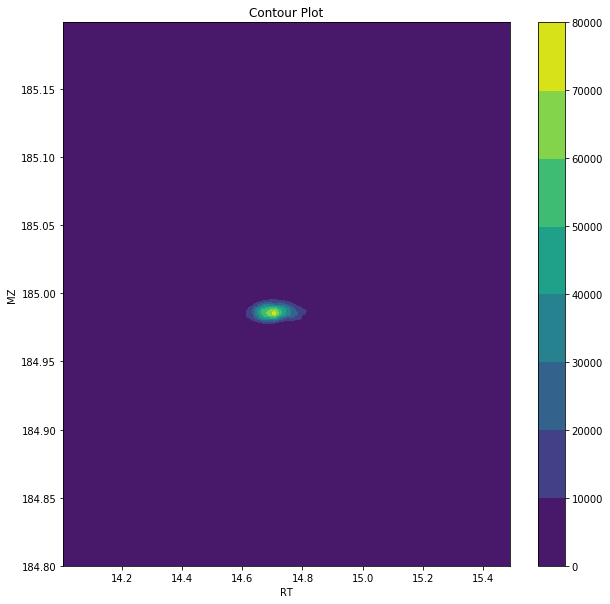

In [39]:
vis.contour_plot((10,10),'Contour Plot','RT','MZ')

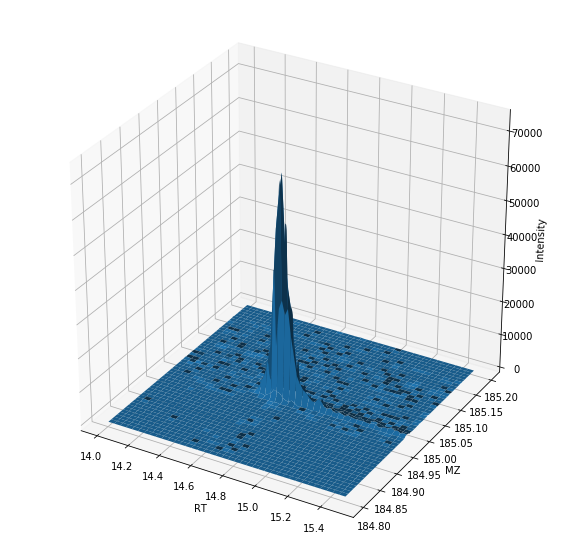

In [40]:
vis.surface_plot3D((10,10),'Surface Plot','RT','MZ','Intensity')